# **Loan Classification Case**

### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple classification algorithms
- Selecting the best Model
- Deploying the best model in production

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [4]:
import pandas as pd
import numpy as np

LoanData=pd.read_csv('../Datasets/LoanApprovalData.csv', encoding='latin')

print('Shape of loan dataset', LoanData.shape)

# Removing the duplicate rows if any
LoanData=LoanData.drop_duplicates()

print('Shape After removing duplicates', LoanData.shape)

Shape of loan dataset (614, 13)
Shape After removing duplicates (614, 13)


In [7]:
LoanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
LoanData['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

### **Defining the problem statement:**
To create predictive model to tell weather a loan would be approved or not?

- Target Variable: Loan_Status
- Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, etc.
- Loan_Status:
    - 'Y': Loan approved
    - 'N': Loan not approved

### **Determining the type of Machine Learning:**
Creating a supervised ML classification model, as the target variable is categorical.

### **Looking at the distribution of Target Variable:**
- If target variable too skewed, then the predictive modelling may not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Classification, make sure there is a balance in the distribution of each class else ML algos ability to learn is impacted.

<Axes: xlabel='Loan_Status'>

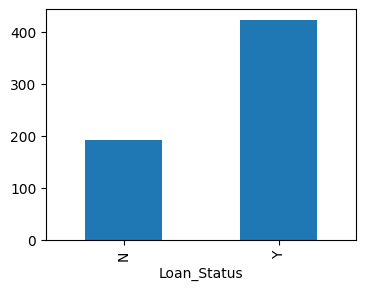

In [9]:
%matplotlib inline
# Creating Bar Chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))